In [1]:
# Import libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read CSV, parse dates, and set index
weather_df = pd.read_csv((r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 10\1\06-Ins_Auto_Correlation\Resources\weather.csv'),
                         parse_dates=True, 
                         index_col='Date')

weather_df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [3]:
# Temperature readings of the first 24 hours
weather_df[:24]

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0
2010-01-01 05:00:00,43.0,36.5,1.0
2010-01-01 06:00:00,43.1,36.3,1.0
2010-01-01 07:00:00,42.3,35.9,1.0
2010-01-01 08:00:00,42.5,36.2,1.0


In [4]:
# Shift and calculate diff
weather_df['Lag_Temp'] = weather_df.Temperature.shift()
weather_df.head()

,Temperature,DewPoint,Pressure,Lag_Temp
Date,,,,
2010-01-01 00:00:00,46.2,37.5,1.0,NaN
2010-01-01 01:00:00,44.6,37.1,1.0,46.2
2010-01-01 02:00:00,44.1,36.9,1.0,44.6
2010-01-01 03:00:00,43.8,36.9,1.0,44.1
2010-01-01 04:00:00,43.5,36.8,1.0,43.8


In [5]:
weather_df["Temp_Diff"] = weather_df.Temperature.diff()
weather_df.head()

,Temperature,DewPoint,Pressure,Lag_Temp,Temp_Diff
Date,,,,,
2010-01-01 00:00:00,46.2,37.5,1.0,NaN,NaN
2010-01-01 01:00:00,44.6,37.1,1.0,46.2,-1.6
2010-01-01 02:00:00,44.1,36.9,1.0,44.6,-0.5
2010-01-01 03:00:00,43.8,36.9,1.0,44.1,-0.3
2010-01-01 04:00:00,43.5,36.8,1.0,43.8,-0.3


Text(0.5, 1.0, 'Temp vs Lag Temp')

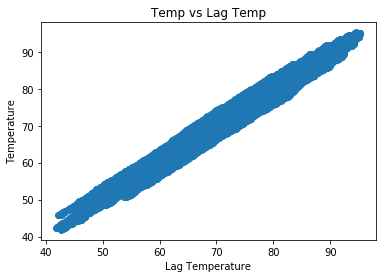

In [6]:
# Scatter plot of lagged temperature vs temperature
x = weather_df["Lag_Temp"]
y = weather_df["Temperature"]

plt.scatter(x, y)
plt.xlabel('Lag Temperature')
plt.ylabel('Temperature')
plt.title('Temp vs Lag Temp')

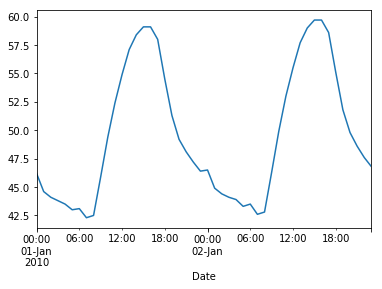

In [7]:
# Plot of the first 48 hours of temp
weather_df[:48].Temperature.plot()

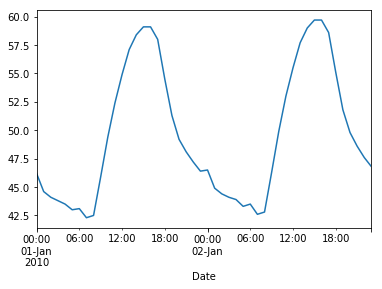

In [8]:
weather_df.Temperature[:48].plot()

In [9]:
# Autocorrelation
weather_df.Temperature.autocorr(lag=1)

0.9909018726597643

In [10]:
# Autocorrelation at lag of 24
weather_df.Temperature.autocorr(lag=24)

0.99979474523129

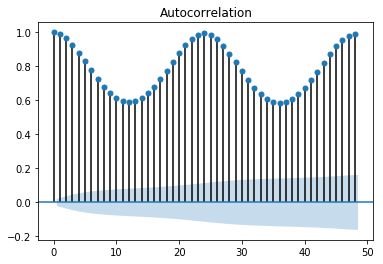

In [11]:
# Import plot_acf() and plot_pacf() from statsmodels:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot_acf() measures autocorrelation at different lags
# Highest autocorrelation at lag of 24 hours
plot_acf(weather_df.Temperature,
         lags=48);

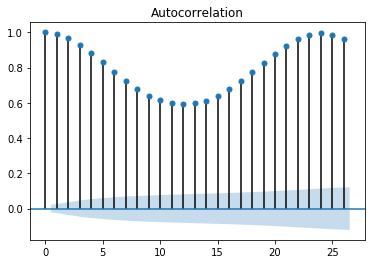

In [12]:
# Plot autocorrelation at lag of 26
plot_acf(weather_df.Temperature,
         lags=26);

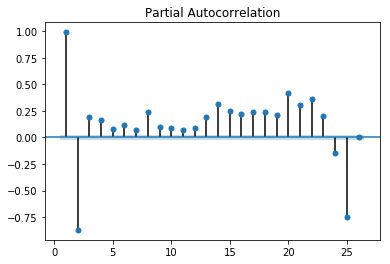

In [13]:
# Plot autocorrelation at lag of 26
sm.graphics.tsaplots.plot_pacf(weather_df.Temperature,
                               lags=26,
                               zero=False);